In [1]:
from root_pandas import read_root
import ROOT
import utility_common as common
from pylab import *
%matplotlib inline

Welcome to JupyROOT 6.16/00


In [2]:
def getSelectionEff(file,name,v,a,b,step):
    df = read_root(file,"tau/bltTree_"+name, columns=[v,"eventWeight"])
    rootFile = ROOT.TFile(file)
    nGen = rootFile.Get("TotalEvents_"+name).GetBinContent(1)
    
    mybin = np.arange(a,b,step)
    variable = np.array(df[v])
    if v == "tauGenFlavor":
        np.place(variable, variable<=3, [1])
        np.place(variable, variable==4, [2])
        np.place(variable, variable==5, [3])
        np.place(variable, variable==21,[4])
        np.place(variable, variable==11,[5])
        np.place(variable, variable==13,[6])
        np.place(variable, variable==15,[0])
        np.place(variable, variable==26,[7])
    h,_ = np.histogram(variable,mybin,weights=df.eventWeight)
    h /= nGen
    return h

In [3]:
v,a,b,step = "tauGenFlavor",0,6,1
baseDir = common.getBaseDirectory()
h = getSelectionEff(baseDir+"data/root/fsr/tau3.root","ttbar_inclusive",v,a,b,step)
hUp = getSelectionEff(baseDir+"data/root/fsr/tau3.root","ttbar_inclusive_fsrUp",v,a,b,step)
hDown = getSelectionEff(baseDir+"data/root/fsr/tau3.root","ttbar_inclusive_fsrDown",v,a,b,step)
hUp = (hUp-h)/sqrt(2)+h
hDown = (hDown-h)/sqrt(2)+h

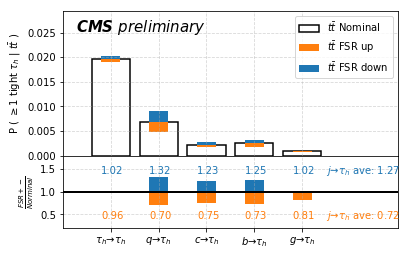

In [4]:
center = np.arange(a,b,step)[:-1]+step/2
fig, axes = plt.subplots(2, 1, sharex=True, facecolor='w',
                         gridspec_kw={'height_ratios':[2,1]},
                         figsize=(6,4))
fig.subplots_adjust(hspace=0)

ax = axes[0]
ax.bar(center,h,facecolor='none',edgecolor='k',linewidth=1.5,label=r"$t\bar{t}$ Nominal")
ax.bar(center,(hUp-h),bottom=h,width=0.4,color="C1",label=r"$t\bar{t}$ FSR up")
ax.bar(center,(hDown-h),bottom=h,width=0.4,color="C0",label=r"$t\bar{t}$ FSR down")

xlim0,xlim1 = a-step/2, b+step/2
ylim0,ylim1 = 0, 1.5*h.max()

ax.grid(True,linestyle='--',alpha=0.5)
ax.set_xlim(xlim0,xlim1)
ax.set_ylim(ylim0,ylim1)
ax.text(0.04*xlim1+0.96*xlim0, 0.85*ylim1, r'CMS $preliminary$',style='italic',fontsize='15',fontweight='bold')
# plt.text(0.04*b+0.96*a, 1.2*h.max(), r'Tight Tau MVA $n_\tau>0$ ',style='italic',fontsize='12')
ax.set_ylabel(r"P ( $\geq1$ tight $\tau_h$ | $t\bar{t}$ )")
ax.legend()

ax = axes[1]
ticksText = [r'$\tau_h\to\tau_h$', r'$q\to\tau_h$', r'$c\to\tau_h$', r'$b\to\tau_h$',
             r'$g\to\tau_h$', r'$e\to\tau_h$', r'$\mu\to\tau_h$','n/a']
plt.xticks(center,ticksText)
ax.grid(True,linestyle='--',alpha=0.5)
ax.axhline(1,c='k',lw=2)
ax.bar(center,hUp/h-1,bottom=1,width=0.4,color="C1")
ax.bar(center,hDown/h-1,bottom=1,width=0.4,color="C0")
ax.set_ylim(0.2,1.8)
ax.set_ylabel(r"$\frac{FSR +-}{Norminal}$")
for c,ratio in zip(center,hUp/h):
    ax.text(c-0.2,0.4,"{:4.2f}".format(ratio),color="C1" )
for c,ratio in zip(center,hDown/h):
    ax.text(c-0.2,1.4,"{:4.2f}".format(ratio),color="C0" )
    
ax.text(5,1.4,r"$j\to\tau_h$ ave: {:4.2f}".format(hDown[1:].sum()/h[1:].sum()),color="C0" )
ax.text(5,0.4,r"$j\to\tau_h$ ave: {:4.2f}".format(hUp  [1:].sum()/h[1:].sum()),color="C1" )
plt.savefig(baseDir+"plots/MCRatio_FSR_{}.png".format(v),dpi=300)

In [17]:
def getSelectionEff_njnb(file,name):
    h = []
    
    df = read_root(file,"tau/bltTree_"+name, columns=["tauGenFlavor","eventWeight","nJets","nBJets"])
    rootFile = ROOT.TFile(file)
    nGen = rootFile.Get("TotalEvents_"+name).GetBinContent(1)
    
    for nJetsCut,nBJetsCut in zip([">=2",">=2",">=2","==1","==1"],
                                  ["==0","==1",">=2","==0",">=1"],
                                 ):
        tempdf = df.query("nJets{} and nBJets{}".format(nJetsCut,nBJetsCut))
        h.append(tempdf[tempdf.tauGenFlavor==15].eventWeight.sum())
        h.append(tempdf.query("tauGenFlavor<6 or tauGenFlavor==22").eventWeight.sum())
    h = np.array(h)
    h /= nGen
    return h

In [18]:
baseDir = common.getBaseDirectory()
h = getSelectionEff_njnb(baseDir+"data/root/fsr/tau3.root","ttbar_inclusive")
hUp = getSelectionEff_njnb(baseDir+"data/root/fsr/tau3.root","ttbar_inclusive_fsrUp")
hDown = getSelectionEff_njnb(baseDir+"data/root/fsr/tau3.root","ttbar_inclusive_fsrDown")
hUp = (hUp-h)/sqrt(2)+h
hDown = (hDown-h)/sqrt(2)+h

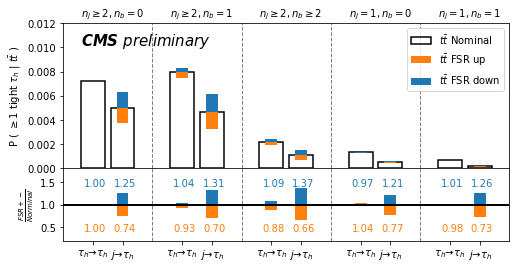

In [24]:
center = np.array([0,1,3,4,6,7,9,10,12,13])#np.arange(h.size)+step/2
fig, axes = plt.subplots(2, 1, sharex=True, facecolor='w',
                         gridspec_kw={'height_ratios':[2,1]},
                         figsize=(8,4))
fig.subplots_adjust(hspace=0)

ax = axes[0]
ax.bar(center,h,facecolor='none',edgecolor='k',linewidth=1.5,label=r"$t\bar{t}$ Nominal")
ax.bar(center,(hUp-h),bottom=h,width=0.4,color="C1",label=r"$t\bar{t}$ FSR up")
ax.bar(center,(hDown-h),bottom=h,width=0.4,color="C0",label=r"$t\bar{t}$ FSR down")

xlim0,xlim1 = center.min()-1, center.max()+1
ylim0,ylim1 = 0, 1.5*h.max()

# ax.grid(True,linestyle='--',alpha=0.5)
ax.text(0-.4,ylim1*1.05, r"$n_j\geq2, n_b=0$")
ax.text(3-.4,ylim1*1.05, r"$n_j\geq2, n_b=1$")
ax.text(6-.4,ylim1*1.05, r"$n_j\geq2, n_b\geq2$")
ax.text(9-.4,ylim1*1.05, r"$n_j=1, n_b=0$")
ax.text(12-.4,ylim1*1.05, r"$n_j=1, n_b=1$")

for i in range(center.max()//3):
    ax.axvline(i*3+2,c='k',linestyle='--',alpha=0.5,lw=1)
ax.set_xlim(xlim0,xlim1)
ax.set_ylim(ylim0,ylim1)
ax.text(0.04*xlim1+0.96*xlim0, 0.85*ylim1, r'CMS $preliminary$',style='italic',fontsize='15',fontweight='bold')
# plt.text(0.04*b+0.96*a, 1.2*h.max(), r'Tight Tau MVA $n_\tau>0$ ',style='italic',fontsize='12')
ax.set_ylabel(r"P ( $\geq1$ tight $\tau_h$ | $t\bar{t}$ )")
ax.legend()

ax = axes[1]
ticksText = [r'$\tau_h\to\tau_h$', r'$j\to\tau_h$']*(center.max()//3+1)
plt.xticks(center,ticksText)
# ax.grid(True,linestyle='--',alpha=0.5)
ax.axhline(1,c='k',lw=2)
for i in range(center.max()//3):
    ax.axvline(i*3+2,c='k',linestyle='--',alpha=0.5,lw=1)
ax.bar(center,hUp/h-1,bottom=1,width=0.4,color="C1")
ax.bar(center,hDown/h-1,bottom=1,width=0.4,color="C0")
ax.set_ylim(0.2,1.8)
ax.set_ylabel(r"$\frac{FSR +-}{Norminal}$")
for c,ratio in zip(center,hUp/h):
    ax.text(c-0.3,0.4,"{:4.2f}".format(ratio),color="C1" )
for c,ratio in zip(center,hDown/h):
    ax.text(c-0.3,1.4,"{:4.2f}".format(ratio),color="C0" )
plt.savefig(baseDir+"plots/MCRatio_FSR_tauGenFlavor3.png",dpi=300)

# v,a,b,step = "nBJets",0,6,1
center = np.arange(a,b,step)[:-1]+step/2
baseDir = common.getBaseDirectory()
h = getSelectionEff(baseDir+"data/root/fsr/tau3.root","ttbar_inclusive",v,a,b,step)
plt.bar(center,h)

4